In [5]:
from create_model import *
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
column_names = ['file', 'star', 'rank']
rank_6819 = pd.read_csv( '/Users/justycewatson/Desktop/CIERA_files/NGC6819/ngc6819_checkRes_all.txt',sep='\s+',names=column_names, skiprows=1)
rank_6819= rank_6819.drop('file', axis=1)

rank_6819

# rank 1 - good sampling (chain converges reasonably)
# rank 2 - poor sampling (no sampling or highly correlated)
# rank 3 - parts of chain seem convergent
# rank 4 - flat distribution 

,star,rank
0,2076220554197701504,4
1,2076220829075672960,4
2,2076220966514688128,3
3,2076224784750223232,4
4,2076227116907912960,4
...,...,...
1683,2076616859415037824,3
1684,2076617276038017664,4
1685,2076617447828109440,4
1686,2076617477890443008,2


In [28]:
directory = '/Users/justycewatson/Desktop/CIERA_files/NGC6819/ngc6819_single_resfiles' 
ngc6819_statistic = create_features(directory)

ngc6819_clean, ngc6819_array = prepare_df_for_model(ngc6819_statistic)
ngc6819_array

pipe = load_model('my_model.pkl')

y_pred_6819 = make_preds(pipe,ngc6819_array)

In [29]:
rank_6819['star'] = rank_6819['star'].astype('str')
ngc6819_statistic['source_id'] = ngc6819_statistic['source_id'].astype('str')

In [30]:
# ngc6819_statistic['source_id'] = ngc6819_statistic['source_id'].str.extract(r'gaia_(\d+)_sin2')
ngc6819_statistic['y_pred'] = y_pred_6819
ngc6819_statistic

ngc6819_statistic = pd.merge(ngc6819_statistic, rank_6819, left_on='source_id', right_on='star', how='inner')
ngc6819_statistic = ngc6819_statistic.drop('star', axis=1)

In [31]:
ngc6819_statistic

,source_id,Width,Upper_bound,Lower_bound,Stdev,SnR,Dip_p,Dip_value,KS_value,KS_p,ESS,y_pred,rank
0,2076279137552154112,1.611105,0.281932,0.241271,0.709164,12.619723,0.0,0.015125,0.174900,2.372503e-168,9367.188906,Bad,4
1,2076298933067389056,0.851659,0.281932,0.241271,0.492672,18.154950,0.0,0.075300,0.250364,0.000000e+00,9841.979256,Bad,3
2,2076584355102288128,1.568087,0.281932,0.241271,0.706918,12.674155,0.0,0.015795,0.166235,1.312156e-149,10180.722728,Bad,4
3,2076488525792609792,0.384405,0.281932,0.241271,0.494811,18.364221,0.0,0.052020,0.280653,0.000000e+00,9875.889888,Bad,3
4,2076581851147039232,1.684027,0.281932,0.241271,0.748072,11.787783,0.0,0.021270,0.188583,9.324736e-193,9655.071072,Bad,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,2076393834663325568,1.420736,0.281932,0.241271,0.685752,12.768550,0.0,0.009732,0.165100,6.007427e-150,9713.745057,Bad,4
1684,2076380400005524224,1.370467,0.281932,0.241271,0.686048,12.883365,0.0,0.021400,0.135628,1.572096e-99,9738.981018,Bad,4
1685,2076299895139969536,0.444381,0.281932,0.241271,0.175729,54.419198,0.0,0.085369,0.162169,1.659127e-143,10053.026501,Good,2
1686,2076393662864610688,1.519873,0.281932,0.241271,0.696125,12.398271,0.0,0.016644,0.163028,3.385140e-146,10102.284612,Bad,4


In [32]:
y_pred_good = ngc6819_statistic[ngc6819_statistic['y_pred'] == 'Good']
y_pred_bad = ngc6819_statistic[ngc6819_statistic['y_pred'] == 'Bad']

In [33]:
y_pred_good

,source_id,Width,Upper_bound,Lower_bound,Stdev,SnR,Dip_p,Dip_value,KS_value,KS_p,ESS,y_pred,rank
8,2076503579664437888,0.271180,0.281932,0.241271,0.129896,72.391950,0.0,0.039233,0.130739,3.245760e-96,10222.713562,Good,2
12,2076297936634830336,0.327157,0.281932,0.241271,0.159509,59.151400,0.0,0.054028,0.103108,1.553741e-58,9888.564071,Good,2
17,2076487671105795712,0.392834,0.281932,0.241271,0.189886,49.821843,0.0,0.030023,0.090602,6.461195e-45,9609.353508,Good,1
22,2076582607061332864,0.137965,0.281932,0.241271,0.072304,129.173750,0.0,0.039524,0.112235,2.102819e-70,10035.588389,Good,1
28,2076487323201436288,0.260399,0.281932,0.241271,0.147711,61.694527,0.0,0.082859,0.352691,0.000000e+00,9711.933433,Good,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674,2076298074073807744,0.469583,0.281932,0.241271,0.211605,44.909809,0.0,0.021254,0.121992,7.672627e-82,10250.981715,Good,1
1676,2076486571594029440,0.231036,0.281932,0.241271,0.115137,81.574421,0.0,0.052743,0.095857,1.234093e-50,9915.632620,Good,2
1677,2076298963119414912,0.287829,0.281932,0.241271,0.115939,78.208941,0.0,0.079890,0.334597,0.000000e+00,9738.326503,Good,2
1685,2076299895139969536,0.444381,0.281932,0.241271,0.175729,54.419198,0.0,0.085369,0.162169,1.659127e-143,10053.026501,Good,2


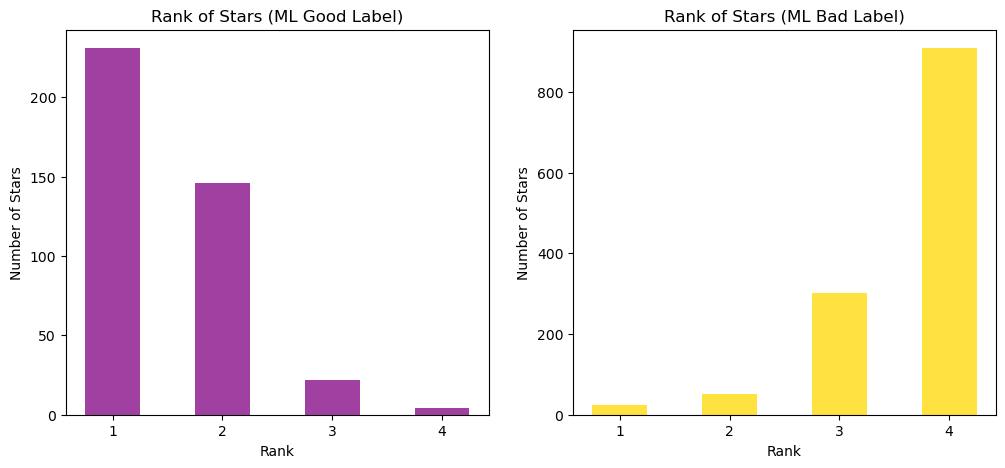

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

rank_counts_good = y_pred_good['rank'].value_counts().sort_index()

ax[0].bar(rank_counts_good.index, rank_counts_good.values, color='purple', width=0.5, alpha=0.75)
ax[0].set_xlabel('Rank')
ax[0].set_ylabel('Number of Stars')
ax[0].set_title('Rank of Stars (ML Good Label)')
ax[0].set_xticks([1, 2, 3, 4]) 



rank_counts_bad = y_pred_bad['rank'].value_counts().sort_index() 

ax[1].bar(rank_counts_bad.index, rank_counts_bad.values, color='gold', width=0.5, alpha=0.75)
ax[1].set_xlabel('Rank')
ax[1].set_ylabel('Number of Stars')
ax[1].set_title('Rank of Stars (ML Bad Label)')
ax[1].set_xticks([1, 2, 3, 4]) 

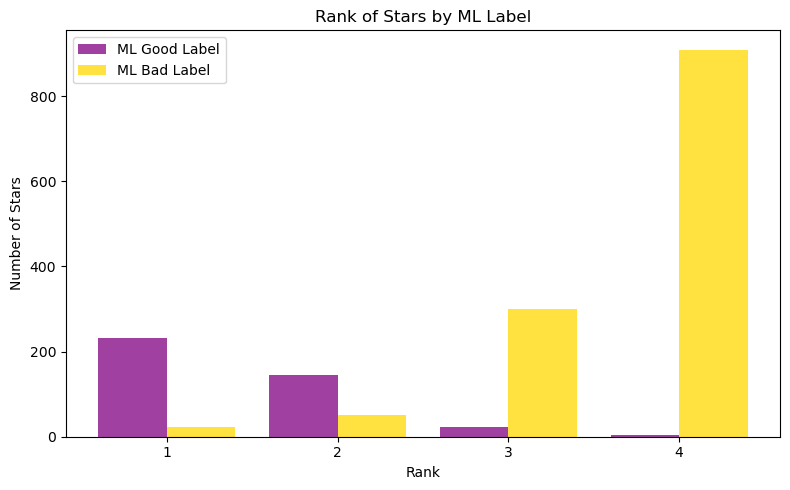

In [35]:
rank_counts_good = y_pred_good['rank'].value_counts().sort_index()
rank_counts_bad = y_pred_bad['rank'].value_counts().sort_index()

ranks = [1, 2, 3, 4]
good_vals = [rank_counts_good.get(r, 0) for r in ranks]
bad_vals = [rank_counts_bad.get(r, 0) for r in ranks]

x = np.arange(len(ranks))  # [0, 1, 2, 3]
bar_width = 0.4



fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x - bar_width/2, good_vals, width=bar_width, color='purple', label='ML Good Label', alpha=0.75)
ax.bar(x + bar_width/2, bad_vals, width=bar_width, color='gold', label='ML Bad Label', alpha=0.75)


ax.set_xlabel('Rank')
ax.set_ylabel('Number of Stars')
ax.set_title('Rank of Stars by ML Label')
ax.set_xticks(x)
ax.set_xticklabels(ranks)
ax.legend()

plt.tight_layout()
plt.show()